In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
import seaborn as sns
import ast
import os

# from matplotlib.colors import LinearSegmentedColormap

import re
import json


In [2]:
# tournois="TCL#10"
# tournois="Coupe Astrale #10 04-10-2024"
# tournois="Grandapan sneaky tournament #1 19-10-2024"
# tournois="TCL#11 08-11-2024"
# tournois="Oshimo autumn cup #2 19-11-2024"
# tournois = "Tili One Cup #1"
# tournois= "Coupe Astrale #11 06-12-2024"
# tournois= "Tili Two Cup #1"
# tournois= "Coupe Astrale #12 09-05-2025"
tournois="Oshimo's Cup - the last raid  09-05-2025"
# tournois="TCL#12 09-05-2025"
# tournois="Tili One Cup #2 02-05-2025"
# tournois="Tili Two Cup #2 25-04-2025"

# tournois_multiples=["Coupe Astrale #12 09-05-2025",
# "Oshimo's Cup - the last raid  09-05-2025",
# "TCL#12 09-05-2025",
# "Tili One Cup #2 02-05-2025",
# "Tili Two Cup #2 25-04-2025",
# ]

In [3]:
Langue='FR'
# Langue='ES'
# Langue='EN'

# Variables

In [4]:
restri_mat=[
    [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,1,1,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,1,1,0,0,0,0,0,0,0,0,0,0,0],
    [0,1,1,0,1,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,1,0,0,0,0,0,0,0,0,0],
    [0,1,1,0,1,0,1,0,0,0,0,0,0,0,0],
    [0,1,1,1,0,0,0,1,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,1,1,0,0,0,0,0,0],
    [0,1,1,0,1,0,0,0,1,1,0,0,0,0,0],
    [0,1,1,0,1,0,1,0,0,0,1,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0],
    [0,1,1,0,1,0,1,0,0,0,0,0,1,0,0],
    [0,1,1,1,1,1,1,1,0,1,1,0,1,1,0],
    [0,1,1,0,1,0,1,0,0,1,1,0,1,1,1],
]

In [5]:
CLASSES=['cra',
        'ecaflip',
        'eniripsa',
        'enutrof',
        'feca',
        'iop',
        'osamodas',
        'pandawa',
        'roublard',
        'sacrieur',
        'sadida',
        'sram',
        'steamer',
        'xelor',
        'zobal']

TRADUCTIONS={
    'xelor' : {'FR' : "xelor","EN" : "xelor", "ES" : "xelor"}
    ,'enutrof' : {'FR' : "enutrof","EN" : "enutrof", "ES" : "anutrof"}
    ,'eniripsa' : {'FR' : "eniripsa","EN" : "eniripsa", "ES" : "aniripsa"}
    ,'osamodas' : {'FR' : "osamodas","EN" : "osamodas", "ES" : "osamodas"}
    ,'zobal' : {'FR' : "zobal","EN" : "zobal", "ES" : "masqueraider"}
    ,'sadida' : {'FR' : "sadida","EN" : "sadida", "ES" : "sadida"}
    ,'steamer' : {'FR' : "steamer","EN" : "foggernaut", "ES" : "steamer"}
    ,'sacrieur' : {'FR' : "sacrieur","EN" : "sacrier", "ES" : "sacrogrito"}
    ,'iop' : {'FR' : "iop","EN" : "iop", "ES" : "yopuka"}
    ,'pandawa' : {'FR' : "pandawa","EN" : "pandawa", "ES" : "pandawa"}
    ,'ecaflip' : {'FR' : "ecaflip","EN" : "ecaflip", "ES" : "zurcarak"}
    ,'cra' : {'FR' : "cra","EN" : "cra", "ES" : "ocra"}
    ,'feca' : {'FR' : "feca","EN" : "feca", "ES" : "feca"}
    ,'sram' : {'FR' : "sram","EN" : "sram", "ES" : "sram"}
    ,'roublard' : {'FR' : "roublard","EN" : "rogue", "ES" : "tymador"}
    ,'compo' : {'FR' : "Compo les plus jouées","EN" : "Most played compositions", "ES" : "Composiciones más jugadas"}
    ,'duo' : {'FR' : "Duos les plus joués","EN" : "Most played duos", "ES" : "Dúos más jugados"}
    ,'classe' : {'FR' : "Nombre de pick des classes","EN" : "Class pickrate", "ES" : "Número de selecciones de clases"}
    
}

# recuperation des données

In [6]:
tn_folder=tournois
try:
    print(tournois_multiples)
    tn_folder='multiple'
    
    team_multiples = []
    for tn in tournois_multiples:
        tn_folder = tn_folder + "_" + tn.replace(" ", "_")
        temp_team = pd.read_excel(tn + "/compo.xlsx")
        temp_team["note"] = tn  # Fill the 'note' column with the value of tn
        team_multiples.append(temp_team)
    team = pd.concat(team_multiples, ignore_index=True)
    
    if not os.path.exists(tn_folder):
        os.makedirs(tn_folder+"/graphs")
        
except NameError:
    team=pd.read_excel(tournois+"/compo.xlsx")
team

,equipe,C1,C2,C3
0,Ah-Tim,sadida,sacrieur,iop
1,Tribe,ecaflip,iop,enutrof
2,Sanction,osamodas,sacrieur,enutrof
3,Veni Vidi Vici,osamodas,sacrieur,pandawa
4,#jesuissqual,osamodas,sacrieur,enutrof
5,Les zyvons,osamodas,sacrieur,enutrof
6,Les tontons flingués,sadida,steamer,enutrof
7,Nom a définir,enutrof,sacrieur,steamer
8,Légion 404,iop,sacrieur,steamer
9,Sid Diego Many,steamer,sacrieur,pandawa


In [7]:
team['C1'].unique()

array(['sadida', 'ecaflip', 'osamodas', 'enutrof', 'iop', 'steamer',
       'eniripsa'], dtype=object)

In [8]:
team['C2'].unique()

array(['sacrieur', 'iop', 'steamer', 'cra', 'enutrof'], dtype=object)

In [9]:
team['C3'].unique()

array(['iop', 'enutrof', 'pandawa', 'steamer', 'cra', 'sram', 'feca'],
      dtype=object)

Verification des fautes de frappe

In [10]:
erreur=False
for c in team['C1']:
    if not c in CLASSES:
        print(c)
        erreur=True
for c in team['C2']:
    if not c in CLASSES:
        print(c)
        erreur=True
for c in team['C3']:
    if not c in CLASSES:
        print(c)
        erreur=True
        
if erreur:
    print("!!! ATTENTION FAUTE DE FRAPPE CLASSE INCONNUE")
else:
    print("Tout est ok")
assert(erreur==False)

Tout est ok


Verification des doublons de classe

In [11]:
# Find rows where values in columns 'C1', 'C2', or 'C3' are equal
equal_rows = team[(team['C1'] == team['C2']) | (team['C1'] == team['C3']) | (team['C2'] == team['C3'])]
assert(len(equal_rows)==0)

# fonctions utiles

In [12]:
def dict_count_val_over(dic,limit):
    count=0
    for v in dic.values():
        if v>limit:
            count+=1
    return count

In [13]:
#fonction qui sert à filtrer et enlever les keys dont la valeur est en dessous de 3

def filterTheDict(dictObj, callback):
    newDict = dict()
    # Iterate over all the items in dictionary
    for (key, value) in dictObj.items():
        # Check if item satisfies the given condition then add to new dict
        if callback((key, value)):
            newDict[key] = value
    return newDict

In [14]:
col_bouf={
    'fond_contour' : '#607d83',
    'fond_graph' : '#96b6bc',
    'barres' : '#37373e',
    'etiquettes' : "black",
}

col_test={
    'fond_contour' : 'red',
    'fond_graph' : 'blue',
    'barres' : 'green',
    'etiquettes' : "black",
}

In [15]:
col_default={
    'fond_contour' : '#607d83',
    'fond_graph' : '#96b6bc',
    'barres' : '#37373e',
    'etiquettes' : "black",
}
def dict_barh(dic,title="michel",sort=False,savefolder=False,sortby="no_sort_df",couleurs=col_default):

    if sort:
        dic_s=dict(sorted(dic.items(), key=lambda item: item[1]))
    else:
        if sortby!="no_sort_df":    
            sortby_s=dict(sorted(sortby.items(), key=lambda item: item[1]))

            dic_s=dict()
            for k in sortby_s.keys():
                dic_s[k]=dic[k]
        else:
            dic_s=dic
    compp=dic_s.items()
    x, y = zip(*compp)   
    # print(x,y)
    offset_text=(max(y)/60)

    fig, ax=plt.subplots(figsize=(10,5),facecolor=couleurs['fond_contour'])#7B7826
    ax.set_facecolor(couleurs['fond_graph'])#B69E44

    x_strip=[k.replace("{","").replace("}","").replace('"',"").replace("'","").replace("[","").replace("]","") for k in x]
    ax.barh(x_strip, y,facecolor=couleurs['barres'])#231D0F
    for i in range(len(x)):
        ax.text( y[i]+offset_text,i, y[i], ha='left',va="center",color=couleurs['etiquettes'])#'black'

    if title!="michel":
        ax.set_title(title)
    plt.tight_layout()

    if savefolder:
        plt.savefig(savefolder+title+'.png')
    
    plt.show()

In [16]:
def sum_dict(d1,d2):
    return {k: d1.get(k, 0) + d2.get(k, 0) for k in set(d1) | set(d2)}

In [17]:
def subsets(s):
    sl=list(s)
    return [{sl[0],sl[1]},{sl[0],sl[2]},{sl[1],sl[2]}]

subsets({'Herdegrize', 'Oshimo', 'Terra Cogita'})   

[{'Oshimo', 'Terra Cogita'},
 {'Herdegrize', 'Oshimo'},
 {'Herdegrize', 'Terra Cogita'}]

# pickrate compo

In [18]:
def pickrate_compo(df,filter=-1,language='FR'):

    temp_df=df.copy()

    compo_count=dict()

    
    for idx, row in temp_df.iterrows():
        # ss={row["classe_J1"],row["classe_J2"],row["classe_J3"]}
        ss=[TRADUCTIONS[row["C1"]][language],TRADUCTIONS[row["C2"]][language],TRADUCTIONS[row["C3"]][language]]
        ss.sort()

        if len(ss)>2:
            if str(ss) in compo_count.keys():
                compo_count[str(ss)]+=1
            else:
                compo_count[str(ss)]=1

    if filter=="auto":
        temp_filter=0
        while(dict_count_val_over(compo_count,temp_filter)>25):
            temp_filter+=1
        if temp_filter>0:
            compo_count=filterTheDict(compo_count, lambda elem : elem[1] > temp_filter)

    elif filter>=0:
        compo_count=filterTheDict(compo_count, lambda elem : elem[1] > filter)

    # dict_barh(compo_count,sort=True,title=title)
    return compo_count

In [19]:
pickrate_compo(team,filter="auto",language=Langue)

{"['iop', 'sacrieur', 'sadida']": 2,
 "['ecaflip', 'enutrof', 'iop']": 1,
 "['enutrof', 'osamodas', 'sacrieur']": 3,
 "['osamodas', 'pandawa', 'sacrieur']": 2,
 "['enutrof', 'sadida', 'steamer']": 1,
 "['enutrof', 'sacrieur', 'steamer']": 1,
 "['iop', 'sacrieur', 'steamer']": 1,
 "['pandawa', 'sacrieur', 'steamer']": 2,
 "['enutrof', 'iop', 'steamer']": 1,
 "['cra', 'eniripsa', 'iop']": 1,
 "['cra', 'eniripsa', 'sram']": 1,
 "['pandawa', 'sacrieur', 'sadida']": 1,
 "['cra', 'sacrieur', 'steamer']": 1,
 "['enutrof', 'feca', 'iop']": 1,
 "['cra', 'sacrieur', 'sadida']": 1}

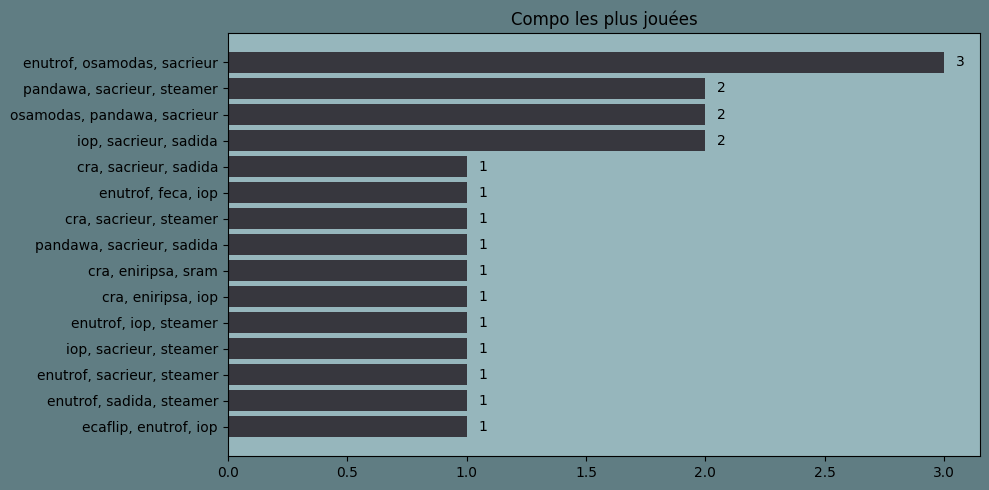

In [20]:
dict_barh(pickrate_compo(team,language=Langue),sort=True,title=TRADUCTIONS["compo"][Langue],savefolder=tn_folder+"/graphs/",couleurs=col_bouf)

# pickrate classes

In [21]:
def pickrate_classes(df,language='FR'):
   
   base=dict()
   # list_classes=df["classe_J1"].unique()
   for c in CLASSES:
      base[c]=0

   temp_df=df

   j1=temp_df.groupby(by=["C1"])["equipe"].count().to_dict()
   j2=temp_df.groupby(by=["C2"])["equipe"].count().to_dict()
   j3=temp_df.groupby(by=["C3"])["equipe"].count().to_dict()
   
   pick_c=sum_dict(sum_dict(sum_dict(base,j1),j2),j3)

   trad_dict={TRADUCTIONS[k][language]: v for k, v in pick_c.items()}

   return trad_dict

In [22]:
pickrate_classes(team,language=Langue)

{'cra': 4,
 'feca': 1,
 'pandawa': 5,
 'roublard': 0,
 'zobal': 0,
 'steamer': 7,
 'xelor': 0,
 'ecaflip': 1,
 'sram': 1,
 'sacrieur': 14,
 'osamodas': 5,
 'eniripsa': 2,
 'sadida': 5,
 'enutrof': 8,
 'iop': 7}

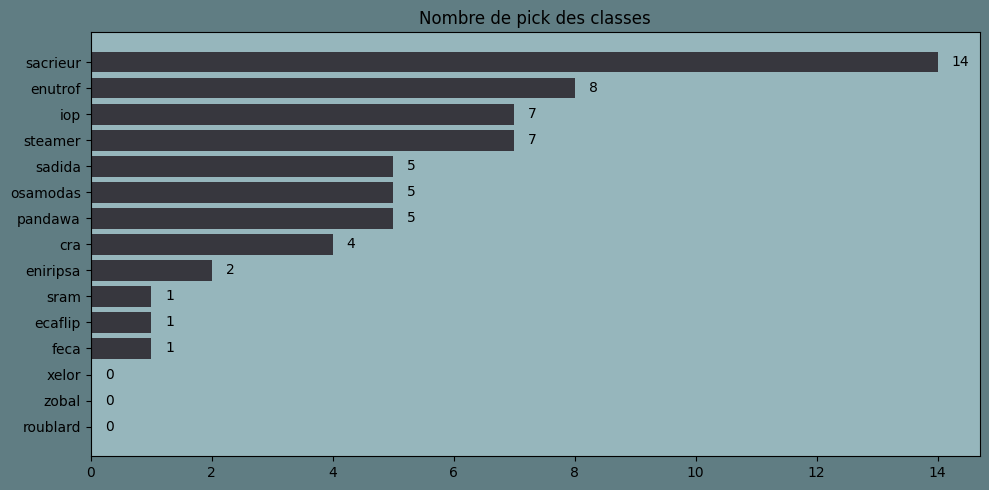

In [23]:
dict_barh(pickrate_classes(team,language=Langue),sort=True,title=TRADUCTIONS["classe"][Langue],savefolder=tn_folder+"/graphs/")

# pickrate duos

In [24]:
def pickrate_duos(df,filter=-1,language="FR"):
    
    
    temp_df=df.copy()
    # title="duos les plus jouées"

    duo_count=dict()

    for idx, row in temp_df.iterrows():
        # ss={row["classe_J1"],row["classe_J2"],row["classe_J3"]}
        ss=[TRADUCTIONS[row["C1"]][language],TRADUCTIONS[row["C2"]][language],TRADUCTIONS[row["C3"]][language]]
        ss.sort()
        if len(ss)==2:
            if str(ss) in duo_count.keys():
                duo_count[str(ss)]+=1
            else:
                duo_count[str(ss)]=1
        elif len(ss)==3:
            sub_list=subsets(ss)
            for sb in sub_list:
                if str(sb) in duo_count.keys():
                    duo_count[str(sb)]+=1
                else:
                    duo_count[str(sb)]=1

    if filter=="auto":
        temp_filter=0
        while(dict_count_val_over(duo_count,temp_filter)>25):
            temp_filter+=1
        if temp_filter>0:
            duo_count=filterTheDict(duo_count, lambda elem : elem[1] > temp_filter)
    elif filter>=0:
        duo_count=filterTheDict(duo_count, lambda elem : elem[1] > filter)

    return duo_count

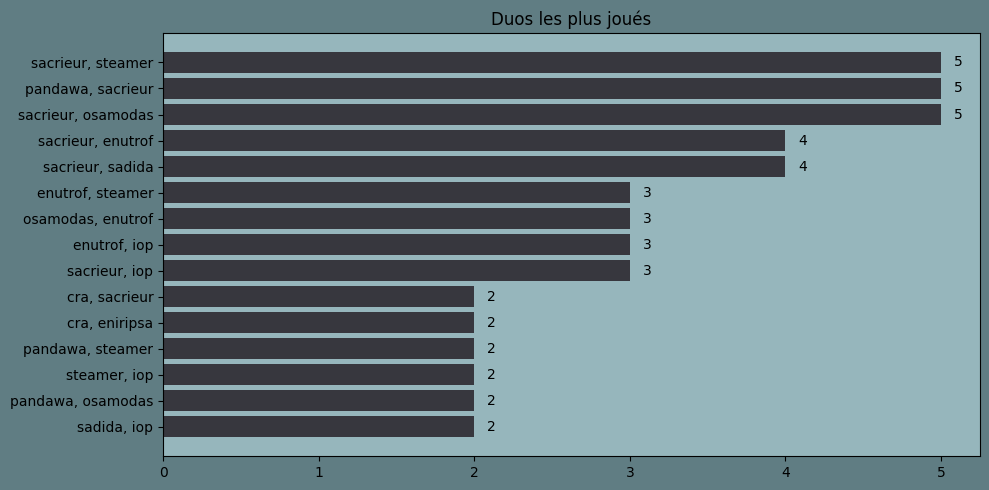

In [25]:
dict_barh(pickrate_duos(team,filter="auto",language=Langue),sort=True,title=TRADUCTIONS["duo"][Langue],savefolder=tn_folder+"/graphs/")

# Heatmap duos

In [26]:
def heatmap_class_duos(duo_dict, restrictions_matrix, title="Restrictions des duos de classes", savefolder=False):
    """
    Affiche une heatmap des duos de classes avec les restrictions.
    
    Args:
        duo_dict (dict): Dictionnaire des duos de classes et leur nombre
        restrictions_matrix (list): Matrice des restrictions (0=autorisé, 1=restreint)
        title (str): Titre du graphique
        savefolder (str): Dossier de sauvegarde (optionnel)
    """
    n_classes = len(CLASSES)
    
    # Création de la matrice de données pour la heatmap
    matrix = np.zeros((n_classes, n_classes))
    
    # Remplissage de la matrice avec les comptages des duos
    for duo_str, count in duo_dict.items():
        duo = ast.literal_eval(duo_str)
        class1, class2 = tuple(duo)
        idx1 = CLASSES.index(class1)
        idx2 = CLASSES.index(class2)
        matrix[idx1, idx2] = count
        matrix[idx2, idx1] = count  # Symétrie
    
    # Création de la matrice de masque pour les restrictions
    mask = np.zeros((n_classes, n_classes), dtype=bool)
    
    # Application des restrictions basées sur la matrice fournie
    for i in range(n_classes):
        for j in range(n_classes):
            # Diagonale (doublons de classe) - toujours restreints
            if i == j:
                mask[i, j] = True
            # Autres restrictions selon la matrice
            elif restrictions_matrix[i][j] == 1:
                mask[i, j] = True
                mask[j, i] = True
    
    # Création d'une palette personnalisée
    # Bleu pâle pour zéro, puis dégradé de jaune à rouge foncé pour les valeurs positives
    # colors = ["#E0F3FF", "#FFFFD9", "#FEE08B", "#FDAE61", "#F46D43", "#D53E4F", "#9E0142"]
    # cmap = LinearSegmentedColormap.from_list("custom_map", colors)
    # Configuration de la figure
    plt.figure(figsize=(16, 8))

    matrix[matrix==0]=0.4 # Remplace les zéros par une valeur très faible pour la heatmap
    # Création de la heatmap avec seaborn
    ax = sns.heatmap(matrix, annot=True, fmt=".0f", cmap="crest", norm=LogNorm(), 
                    linewidths=1, linecolor='black',
                    xticklabels=CLASSES, yticklabels=CLASSES,
                    mask=mask, cbar_kws={'label': 'Nombre de pick','format': '%i'},cbar=False,
                    vmin=0, vmax=max(1, np.max(matrix)))  # Force vmin=0 et vmax au moins 1
    
    # Ajouter une couleur grise uniforme pour les cellules masquées
    ax.set_facecolor('lightgrey')

    # Ajout des croix rouges sur les cases restreintes
    for i in range(n_classes):
        for j in range(n_classes):
            if mask[i, j] :
                plt.text(j + 0.5, i + 0.5, 'X', color='grey', 
                         fontsize=15, ha='center', va='center', weight='bold')
                plt.text(i + 0.5, j + 0.5, 'X', color='grey', 
                         fontsize=15, ha='center', va='center', weight='bold')

    # Configuration des axes
    plt.title(title, fontsize=20, weight='bold') 
    plt.tight_layout()
    
	# Déplacer l'axe des x en haut
    ax.xaxis.set_label_position('top')
    ax.xaxis.tick_top()

    # Rotation des étiquettes pour une meilleure lisibilité
    plt.xticks(rotation=0, ha='center',fontsize=11)
    plt.yticks(rotation=0,fontsize=12)
    
    # Sauvegarde si nécessaire
    if savefolder:
        plt.savefig(savefolder + title + '.png', dpi=300, bbox_inches='tight')
    
    plt.show()

In [27]:
pickrate_duos(team,language=Langue)

{"{'sacrieur', 'iop'}": 3,
 "{'sadida', 'iop'}": 2,
 "{'sacrieur', 'sadida'}": 4,
 "{'ecaflip', 'enutrof'}": 1,
 "{'ecaflip', 'iop'}": 1,
 "{'enutrof', 'iop'}": 3,
 "{'osamodas', 'enutrof'}": 3,
 "{'sacrieur', 'enutrof'}": 4,
 "{'sacrieur', 'osamodas'}": 5,
 "{'pandawa', 'osamodas'}": 2,
 "{'pandawa', 'sacrieur'}": 5,
 "{'enutrof', 'sadida'}": 1,
 "{'enutrof', 'steamer'}": 3,
 "{'sadida', 'steamer'}": 1,
 "{'sacrieur', 'steamer'}": 5,
 "{'steamer', 'iop'}": 2,
 "{'pandawa', 'steamer'}": 2,
 "{'cra', 'eniripsa'}": 2,
 "{'cra', 'iop'}": 1,
 "{'eniripsa', 'iop'}": 1,
 "{'cra', 'sram'}": 1,
 "{'eniripsa', 'sram'}": 1,
 "{'pandawa', 'sadida'}": 1,
 "{'cra', 'sacrieur'}": 2,
 "{'cra', 'steamer'}": 1,
 "{'feca', 'enutrof'}": 1,
 "{'feca', 'iop'}": 1,
 "{'cra', 'sadida'}": 1}

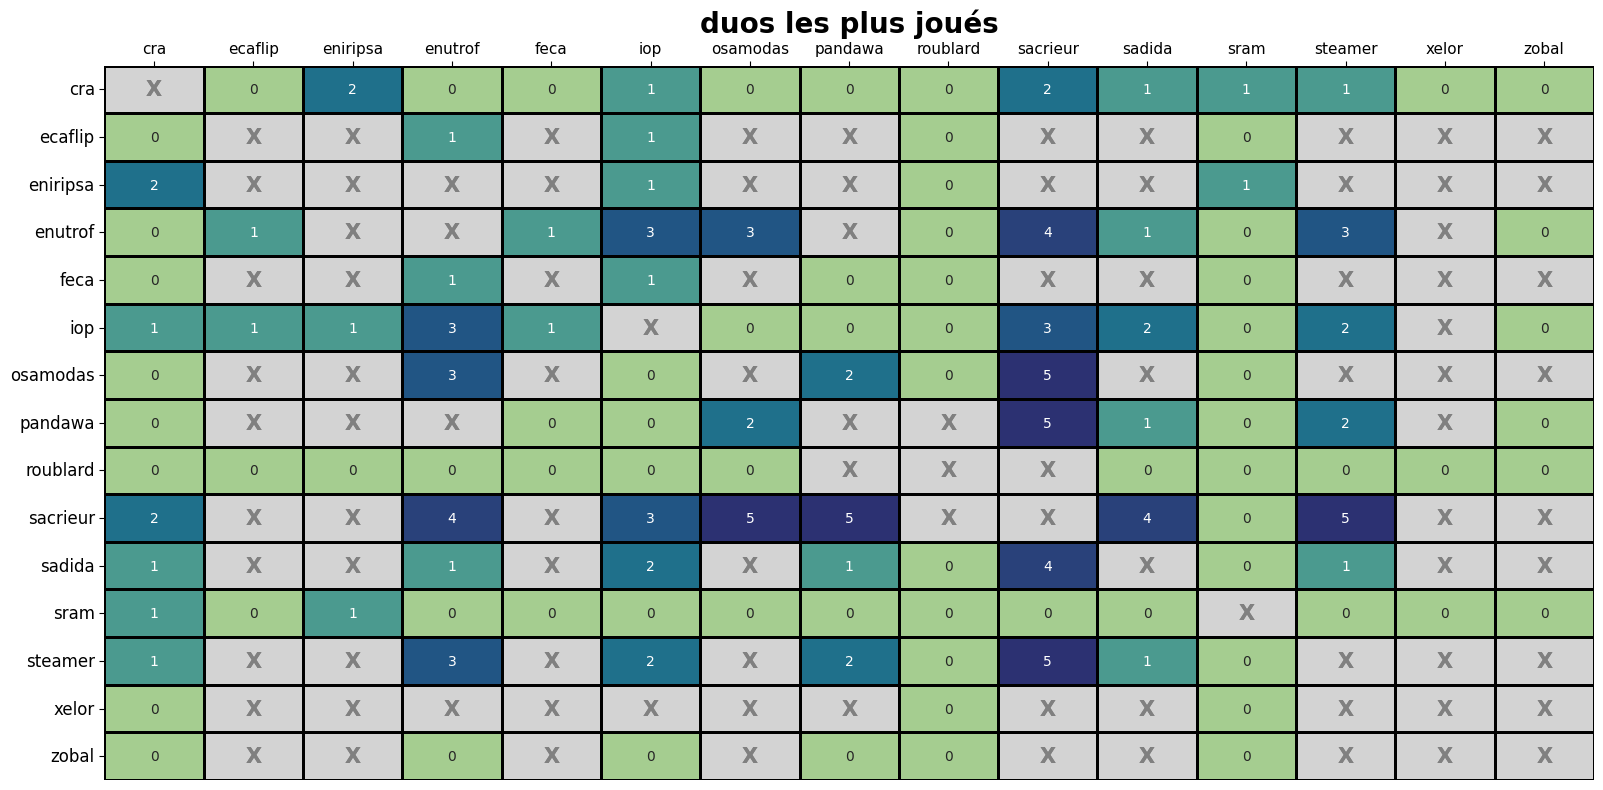

In [28]:
heatmap_class_duos(pickrate_duos(team,language=Langue), restri_mat, title="duos les plus joués", savefolder=tn_folder+"/graphs/heat_")